## LGM VIRTUAL INTERNSHIP PROGRAM

### IRIS FLOWER CLASSIFICATION ML PROJECT

### Author- Vivek R Nair

### Importing all Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris_df = pd.read_csv("Iris.csv")

### Exploratory Data Analysis on Dataset

In [3]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris_df.shape

(150, 6)

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_df = iris_df.drop(columns="Id", axis=1)

#### Checking for null values in the dataset

In [9]:
iris_df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values in the dataset

#### Plotting the distribution of the dataset

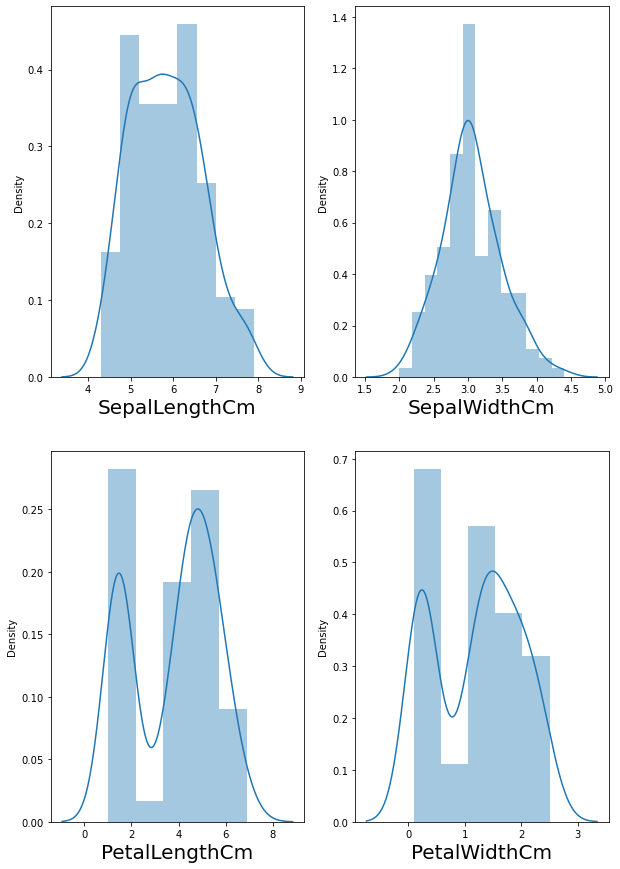

In [10]:
plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in iris_df:
    if plotnumber<=4 :   
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(iris_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Checjing for outliers

<AxesSubplot:>

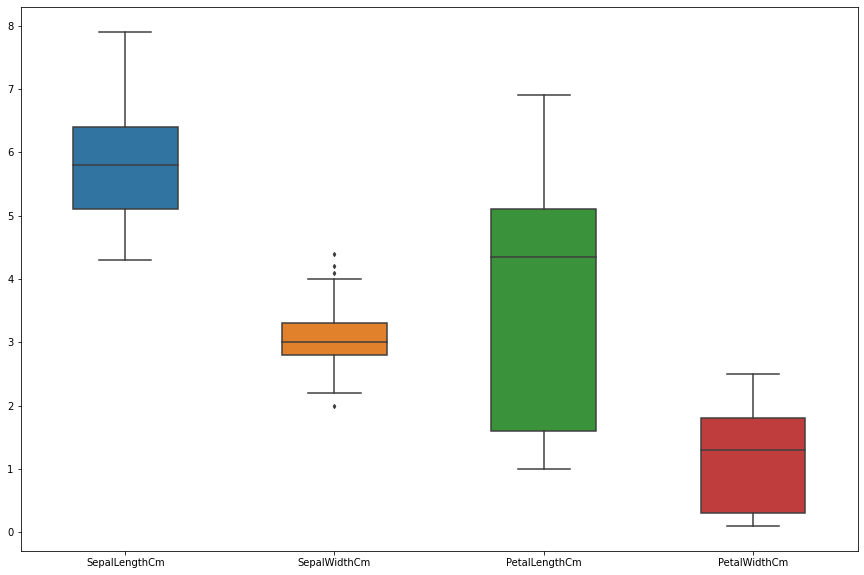

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=iris_df, width= 0.5,ax=ax,  fliersize=3)

<AxesSubplot:>

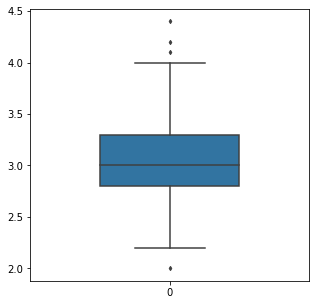

In [37]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=iris_df["SepalWidthCm"], width= 0.5,ax=ax,  fliersize=3)

We can notice some outliers in the Sepal Width column

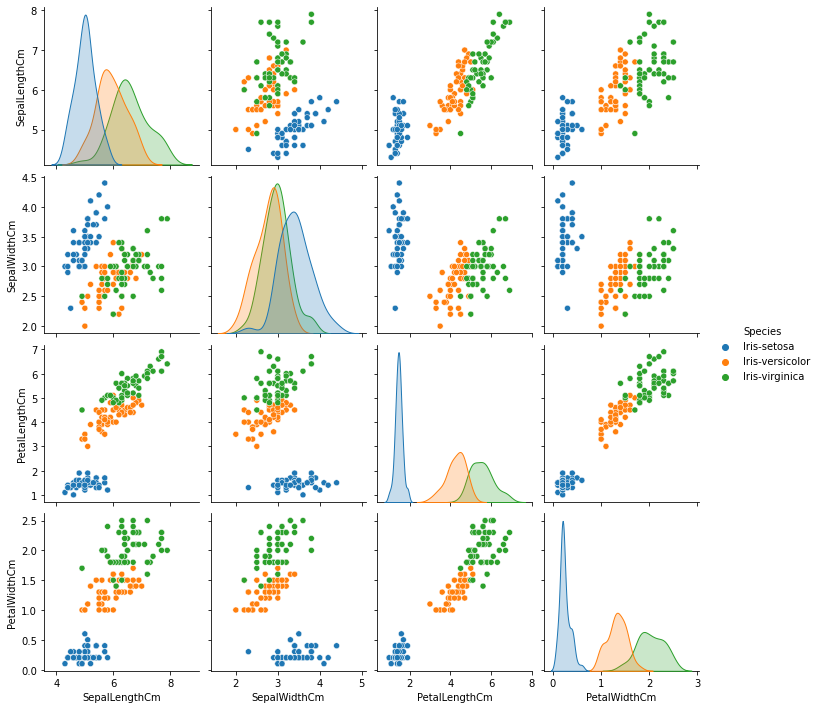

In [12]:
sns.pairplot(data = iris_df, hue="Species")
plt.show()

#### Checking the correlation of the features

In [13]:
iris_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


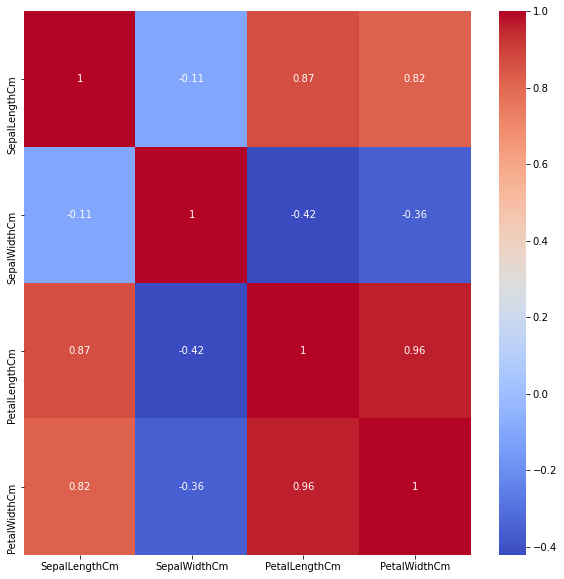

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data=iris_df.corr(),annot=True, cmap="coolwarm" )
plt.show()

We can see that the Petal Length and Petal Width are highly correlated positively

### Performing the split on the dataset

In [15]:
X = iris_df.drop("Species", axis=1)
y= iris_df["Species"]

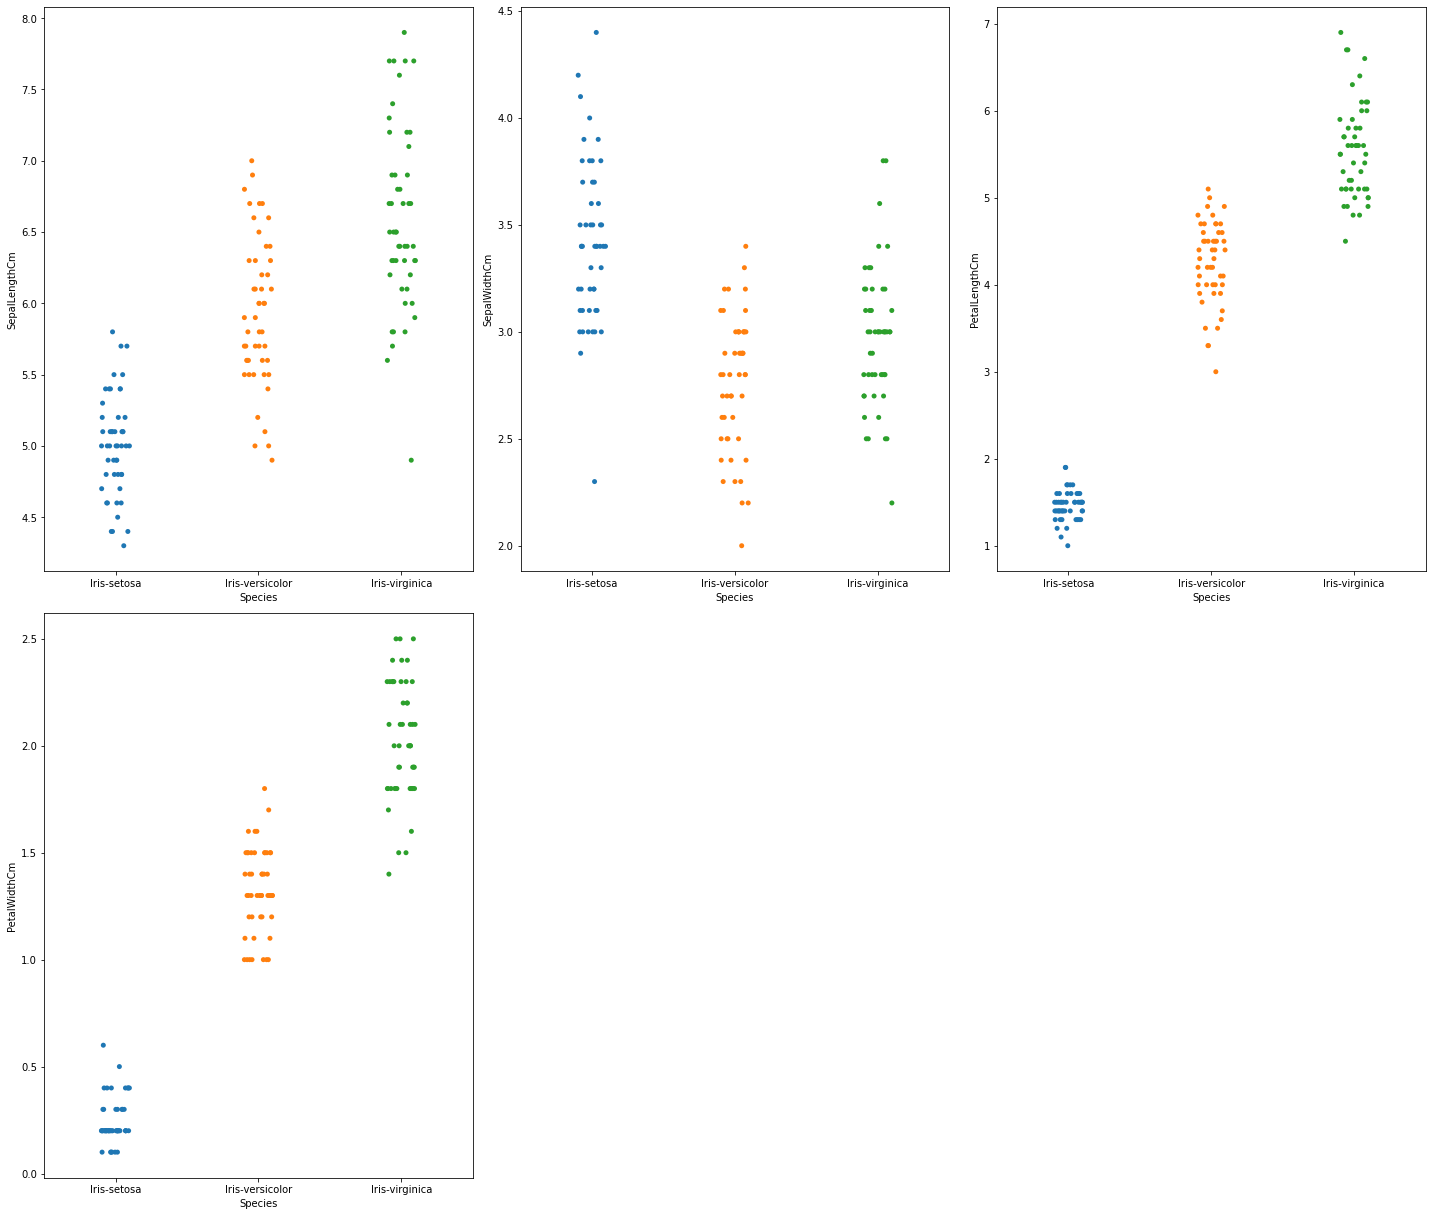

In [16]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

#### Encoding the target variable

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### Normalising the data

In [18]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

### Logistic Regression

In [21]:
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state = 5)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [42]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred = classifier.predict(X_test)

In [44]:
pd.DataFrame({"Actual Result":y_test, "Predicted Result":y_pred} )

,Actual Result,Predicted Result
0,1,1
1,2,1
2,2,2
3,0,0
4,2,2
5,1,1
6,0,0
7,1,2
8,0,0
9,1,1


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.95

In [46]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat


array([[20,  0,  0],
       [ 0, 20,  1],
       [ 0,  2, 17]], dtype=int64)

### K Nearest Neighbours

In [51]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [52]:
y_pred = classifier.predict(X_test)

In [53]:
pd.DataFrame({"Actual Result":y_test, "Predicted Result":y_pred} )

,Actual Result,Predicted Result
0,1,1
1,2,2
2,2,2
3,0,0
4,2,2
5,1,1
6,0,0
7,1,2
8,0,0
9,1,1


In [54]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[20  0  0]
 [ 0 20  1]
 [ 0  1 18]]


0.9666666666666667

### Random Forest Classification

In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [56]:
y_pred = classifier.predict(X_test)

In [57]:
pd.DataFrame({"Actual Result":y_test, "Predicted Result":y_pred} )

,Actual Result,Predicted Result
0,1,1
1,2,2
2,2,2
3,0,0
4,2,2
5,1,1
6,0,0
7,1,2
8,0,0
9,1,1


In [58]:

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[20  0  0]
 [ 0 20  1]
 [ 0  0 19]]


0.9833333333333333

We can see that the accuracy that we got from the above 3 models are mentioned below 

Model                  Accuracy

Logistic Regression    95.00%

KNN                    96.67%

Random Forest          98.33%

Hence we can conclude that Random forest is showing better accuracy among the models .



## THANK YOU !!!